In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget

In [2]:
#path_to_data = "/Users/kassand/astro/PlanetMigration_ML/training_data/"
path_to_data = "/Users/kassand/astro/PlanetMigration_ML/training_data/"
df = pd.read_csv(path_to_data + "alldata_additional_features.csv")

# Remove planets that are in the process of migrating, because they are a negligibly small fraction of cases
df = df[df["flag"] < 3]

# Add some additional quantities of interest to the dataframe
df["a2eff_over_a1_input"] = df["a2eff_input"].values/df["a1_input"].values
df["Imut_input_deg"] = df["Imut_input"].values*180/np.pi

# Create separate dataframes for each remaining class
df_NM = df[df["flag"] == 0]
df_MG = df[df["flag"] == 1]
df_TD = df[df["flag"] == 2]

# Calculate fractions in each class
f_NM = len(df_NM.index.values)/len(df.index.values)
f_MG = len(df_MG.index.values)/len(df.index.values)
f_TD = len(df_TD.index.values)/len(df.index.values)

print("Non-migrating fraction: ", f_NM)
print("Migrating fraction: ", f_MG)
print("Tidally disrupted fraction: ", f_TD)

Non-migrating fraction:  0.8880837359098228
Migrating fraction:  0.0447866344605475
Tidally disrupted fraction:  0.06712962962962964


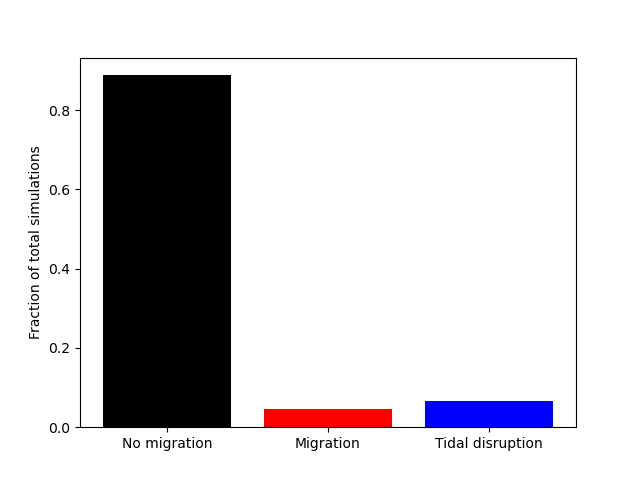

In [3]:
# Plot a bar chart showing frequencies of each outcome
plt.bar(["No migration", "Migration", "Tidal disruption"],[f_NM, f_MG, f_TD], color = ['k','r','b'])
plt.ylabel("Fraction of total simulations")
plt.savefig("../images/outcomes.png")
plt.show()

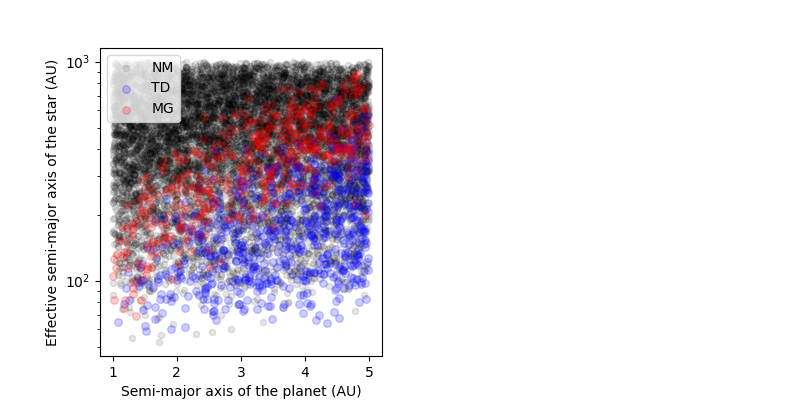

In [4]:
# Plot the simulation outcomes based on several important orbital parameters
plt.figure(figsize=(8,4))
ax1 = plt.subplot(1,2,1)
plt.scatter(df_NM['a1_input'], df_NM['a2eff_input'], c='k', s = 20, alpha = 0.1, label = "NM")
plt.scatter(df_TD['a1_input'], df_TD['a2eff_input'], c='b', s = 30, alpha = 0.2, label = "TD")
plt.scatter(df_MG['a1_input'], df_MG['a2eff_input'], c='r', s = 30, alpha = 0.2, label = "MG")
plt.legend(loc = 2)
ax1.set_yscale("log")
ax1.set_xlabel("Semi-major axis of the planet (AU)")
ax1.set_ylabel("Effective semi-major axis of the star (AU)")
plt.savefig("../images/outcomes_orbital_parameters.png")
plt.show()

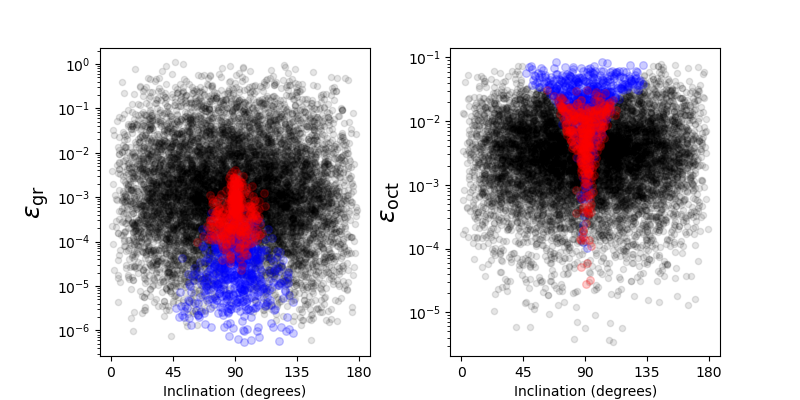

In [5]:
# Plot the simulation outcomes based on several additional important input features
plt.figure(figsize=(8,4))
ax2 = plt.subplot(1,2,1)
plt.scatter(df_NM['Imut_input_deg'], df_NM["eps_gr_input"], c='k', s = 20, alpha = 0.1)
plt.scatter(df_TD['Imut_input_deg'], df_TD["eps_gr_input"], c='b', s = 30, alpha = 0.2)
plt.scatter(df_MG['Imut_input_deg'], df_MG["eps_gr_input"], c='r', s = 30, alpha = 0.2)
ax2.set_yscale('log')
ax2.set_xlabel("Inclination (degrees)")
ax2.set_ylabel("$\epsilon_{\mathrm{gr}}$",fontsize = 18)
ax2.set_xticks([0, 45, 90, 135, 180])

ax3 = plt.subplot(1,2,2)
plt.scatter(df_NM['Imut_input_deg'], df_NM["eps_oct_input"], c='k', s = 20, alpha = 0.1)
plt.scatter(df_TD['Imut_input_deg'], df_TD["eps_oct_input"], c='b', s = 30, alpha = 0.2)
plt.scatter(df_MG['Imut_input_deg'], df_MG["eps_oct_input"], c='r', s = 30, alpha = 0.2)
ax3.set_yscale('log')
ax3.set_xlabel("Inclination (degrees)")
ax3.set_ylabel("$\epsilon_{\mathrm{oct}}$",fontsize = 18)
ax3.set_xticks([0, 45, 90, 135, 180])

plt.subplots_adjust(wspace = 0.3)
plt.savefig("../images/outcomes_epsilon.png")

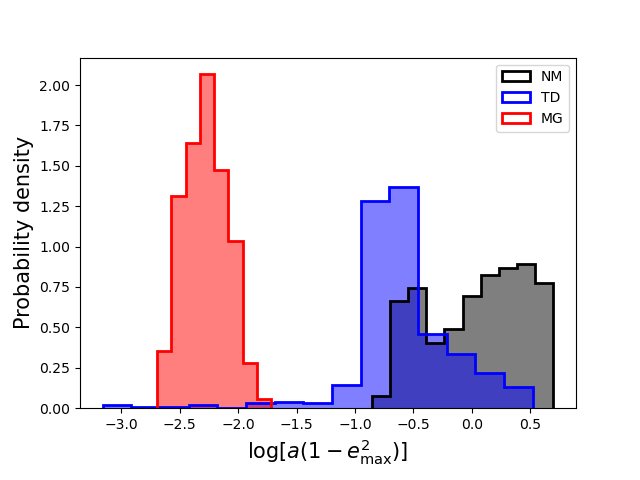

In [6]:
plt.figure()
ax4 = plt.subplot(1,1,1)
plt.hist(df_NM["log_aF_max_input"], bins = 10, color = 'k', density = True, alpha = 0.5)
plt.hist(df_TD["log_aF_max_input"], bins = 15, color = 'b', density = True, alpha = 0.5)
plt.hist(df_MG["log_aF_max_input"], bins =  8, color = 'r', density = True, alpha = 0.5)

plt.hist(df_NM["log_aF_max_input"], bins = 10, color = 'k', density = True, label = "NM", histtype = "step", linewidth = 2)
plt.hist(df_TD["log_aF_max_input"], bins = 15, color = 'b', density = True, label = "TD", histtype = "step", linewidth = 2)
plt.hist(df_MG["log_aF_max_input"], bins =  8, color = 'r', density = True, label = "MG", histtype = "step", linewidth = 2)
plt.legend(loc = 1)
ax4.set_xlabel("$\log [a (1 - e_{\mathrm{max}}^2)]$", fontsize = 15)
ax4.set_ylabel("Probability density",fontsize = 15)
plt.subplots_adjust(bottom = 0.15)
plt.savefig("../images/aF_histogram.png")